### Load the dataset

Loads the California Housing Dataset from Kaggle. 

In [1]:
import os

import kagglehub
import pandas as pd

from config import DATASET

# Download latest version
path = kagglehub.dataset_download(DATASET)  # saved in cache

print("Path to dataset files:", path)


def load_housing_data():
    # loaded to pandas
    return pd.read_csv(os.path.join(path, "housing.csv"))


housing = load_housing_data()

/home/helenaschneider/dev/housing-price-predictor/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/helenaschneider/.cache/kagglehub/datasets/camnugent/california-housing-prices/versions/1


In [2]:
print(housing.head())
print(housing.info())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639

In [3]:
housing["ocean_proximity"].value_counts()
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


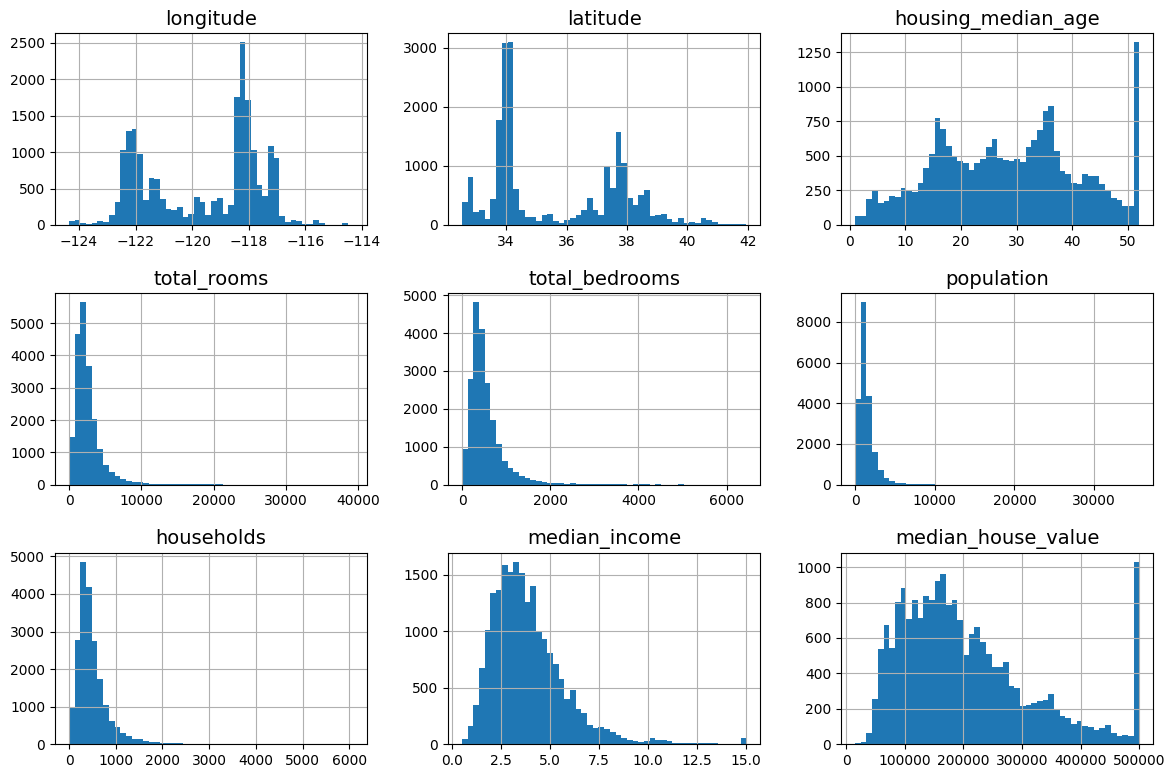

In [4]:
import matplotlib.pyplot as plt

from utils.figures import save_fig

# extra code – the next 5 lines define the default font sizes
plt.rc("font", size=14)
plt.rc("axes", labelsize=14, titlesize=14)
plt.rc("legend", fontsize=14)
plt.rc("xtick", labelsize=10)
plt.rc("ytick", labelsize=10)

housing.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")  # extra code
plt.show()

### Visualize data

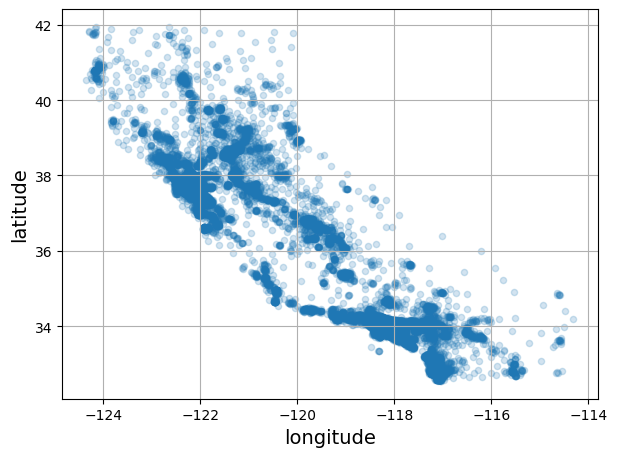

In [5]:
housing_copy = housing.copy()
housing_copy.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
save_fig("geodata_scatterplot")
plt.show()

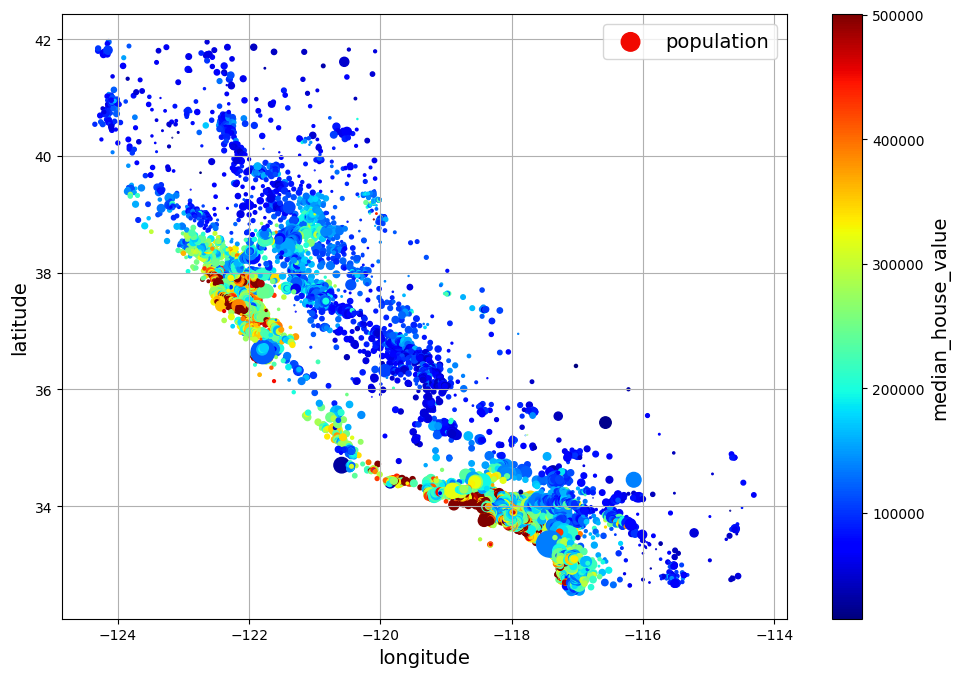

In [6]:
housing_copy.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    grid=True,
    s=housing_copy["population"] / 100,
    label="population",
    c="median_house_value",
    cmap="jet",
    colorbar=True,
    legend=True,
    sharex=False,
    figsize=(10, 7),
)
save_fig("price_population_per_district_scatterplot")
plt.show()

In [7]:
def print_corr(data):
    # Select only the numeric columns
    numeric_data = data.select_dtypes(include=[float, int])

    # Calculate the correlation matrix on the numeric data
    corr_matrix = numeric_data.corr()
    corr_matrix["median_house_value"].sort_values(ascending=False)
    # Display the correlation matrix
    print(corr_matrix)


print_corr(housing_copy)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

<Figure size 640x480 with 0 Axes>

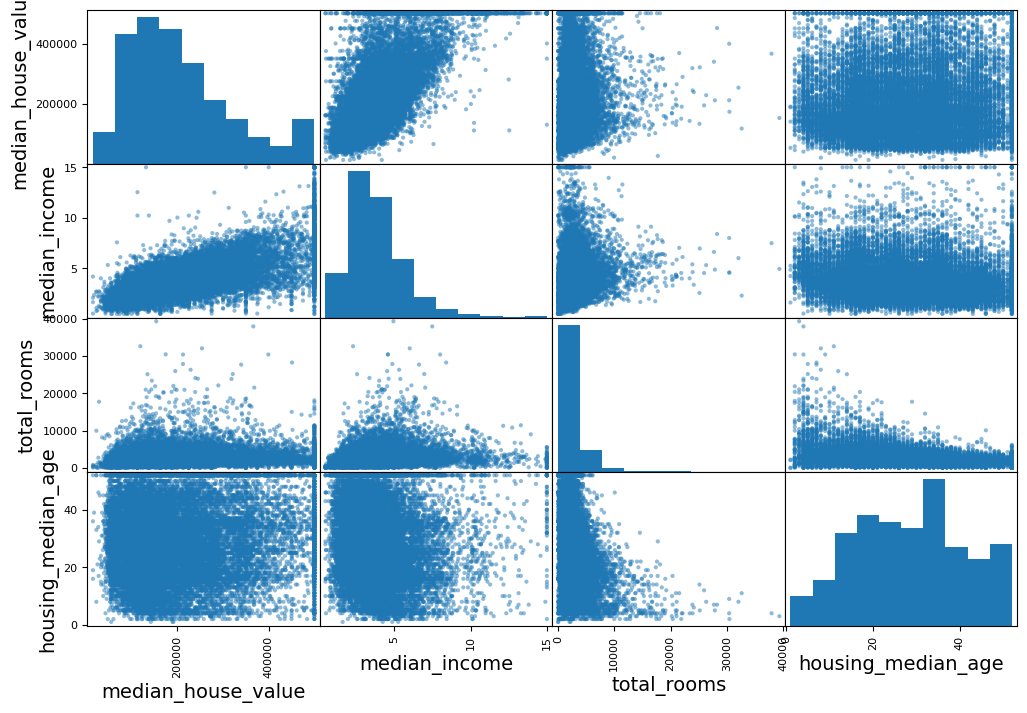

In [8]:
from pandas.plotting import scatter_matrix


def plot_scatter_matrix(df, attributes, id):
    save_fig(f"scatter_mix_plot_{id}")
    scatter_matrix(df[attributes], figsize=(12, 8))
    plt.show()


attributes = [
    "median_house_value",
    "median_income",
    "total_rooms",
    "housing_median_age",
]
plot_scatter_matrix(housing, attributes, "initial")

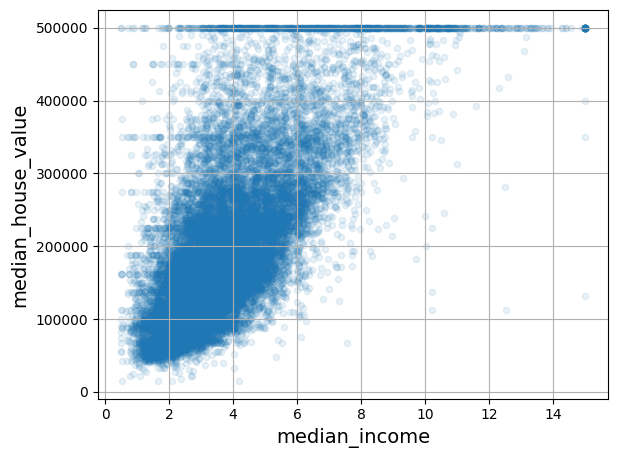

In [9]:
# check if median income is a good predictor for median house value
housing.plot(
    kind="scatter", x="median_income", y="median_house_value", alpha=0.1, grid=True
)
save_fig("income_house_value_scatterplot")
plt.show()

### Preprocessing

In [10]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

print_corr(housing)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   
rooms_per_house     -0.027540  0.106389           -0.153277     0.133798   
bedrooms_ratio       0.092657 -0.113815            0.136089    -0.187900   
people_per_house     0.002476  0.002366            0.013191    -0.024581   

           

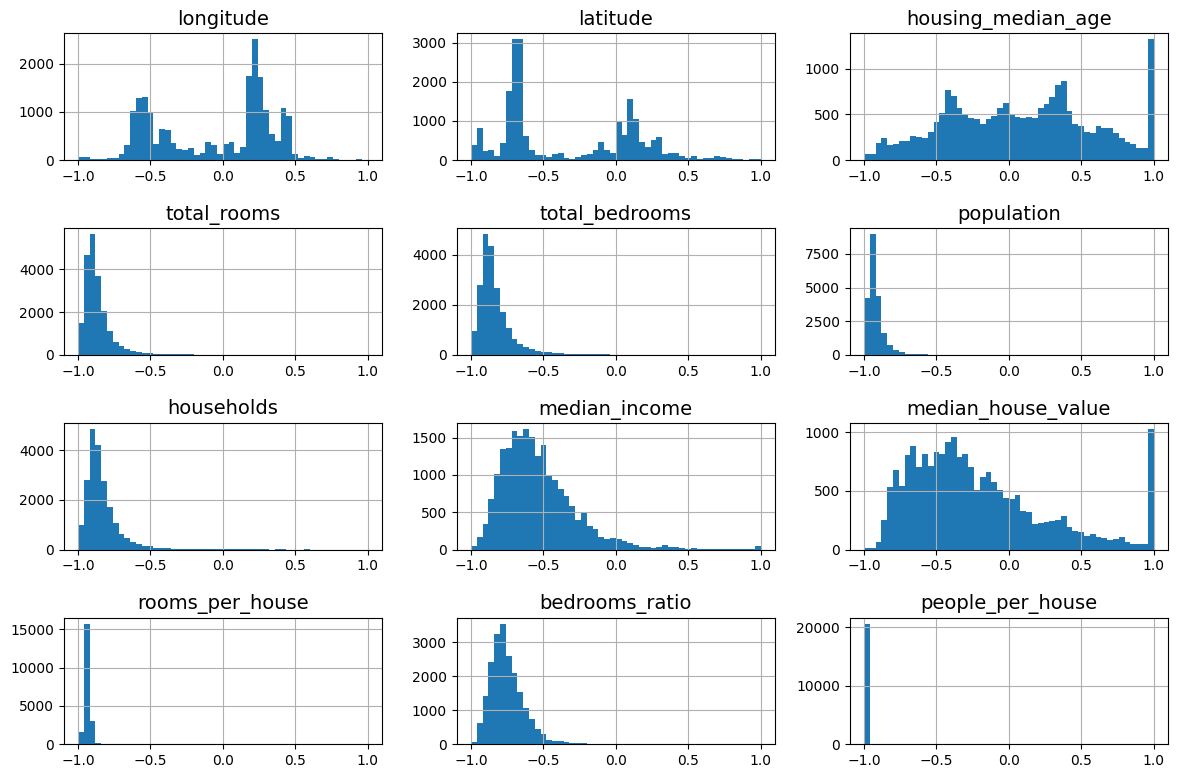

In [11]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

housing.reset_index()
num_pipeline = Pipeline(
    [
        ("impute", SimpleImputer(strategy="median")),  # insert missing values
        ("scaler", MinMaxScaler(feature_range=(-1, 1))),  # scale num values
    ]
)

housing_num = housing.select_dtypes(include=[np.number])  # numeric values
housing_num_tarnsformed_arrays = num_pipeline.fit_transform(housing_num)
housing_num_transformed_df = pd.DataFrame(
    housing_num_tarnsformed_arrays, columns=housing_num.columns, index=housing_num.index
)


# plot changes
plt.rc("font", size=14)
plt.rc("axes", labelsize=14, titlesize=14)
plt.rc("legend", fontsize=14)
plt.rc("xtick", labelsize=10)
plt.rc("ytick", labelsize=10)

housing_num_transformed_df.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots_after_scaling")  # extra code
plt.show()

In [12]:
housing_cat = housing[["ocean_proximity"]]  # categorial attribute
housing_cat.head(8)

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
5,NEAR BAY
6,NEAR BAY
7,NEAR BAY


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# One Hot encoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
# Convert to a NumPy array
housing_cat_1hot_dense = housing_cat_1hot.toarray()
# Get the feature names (categories) from the encoder
categories = cat_encoder.get_feature_names_out(input_features=housing_cat.columns)
# Convert to a pandas DataFrame
housing_cat_1hot_df = pd.DataFrame(
    housing_cat_1hot_dense, columns=categories, index=housing_cat.index
)
housing_transformed = pd.concat(
    [housing_num_transformed_df, housing_cat_1hot_df], axis=1
)
print(housing_transformed["median_income"].isnull().sum())

0


#### Train Model

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0      -0.577689  0.134963            0.568627    -0.955339       -0.960273   
1      -0.575697  0.130712           -0.215686    -0.638995       -0.657045   
2      -0.579681  0.128587            1.000000    -0.925479       -0.941341   
3      -0.581673  0.128587            1.000000    -0.935297       -0.927374   
4      -0.581673  0.128587            1.000000    -0.917341       -0.913408   
...          ...       ...                 ...          ...             ...   
20635  -0.350598  0.475027           -0.058824    -0.915408       -0.884233   
20636  -0.374502  0.477152           -0.333333    -0.964647       -0.953755   
20637  -0.376494  0.464400           -0.372549    -0.885447       -0.849783   
20638  -0.396414  0.464400           -0.333333    -0.905489       -0.873371   
20639  -0.380478  0.451647           -0.411765    -0.858436       -0.809125   

       population  households  median_income  media

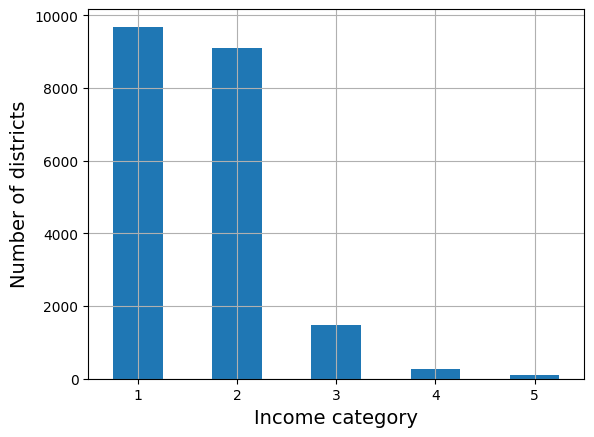

In [14]:
# set seed to ensure same output for multiple runs
import numpy as np
from sklearn.model_selection import train_test_split

from config import DATA_PATH, RANDOM_SEED

# ensure instances from each median income stratum
housing_transformed["income_cat"] = pd.cut(
    housing_transformed["median_income"],
    bins=[-1.1, -0.6, -0.2, 0.2, 0.6, 1.1],
    labels=[1, 2, 3, 4, 5],
)

print(housing_transformed)

housing_transformed["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

# use the stratisfied splitter
strat_train_set, strat_test_set = train_test_split(
    housing_transformed,
    test_size=0.2,
    stratify=housing_transformed["income_cat"],
    random_state=RANDOM_SEED,
)

# income_cat not needed anymore
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Save the stratified training and test sets to CSV files
strat_train_set.to_csv(os.path.join(DATA_PATH, "strat_train_set.csv"), index=False)
strat_test_set.to_csv(os.path.join(DATA_PATH, "strat_test_set.csv"), index=False)

#### Train and Save Model

In [15]:
from pickle import dump

from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from config import MODEL_PATH

housing_labels_train = strat_train_set["median_house_value"]
model = TransformedTargetRegressor(LinearRegression(), transformer=StandardScaler())
model.fit(strat_train_set[["median_income"]], housing_labels_train)

model_file_path = os.path.join(MODEL_PATH, "price_estimator_model.pkl")

with open(model_file_path, "wb") as file:
    dump(model, file, protocol=5)  # set protocol 5 to reduce memory usage

FileNotFoundError: [Errno 2] No such file or directory: 'model/price_estimator_model.pkl'